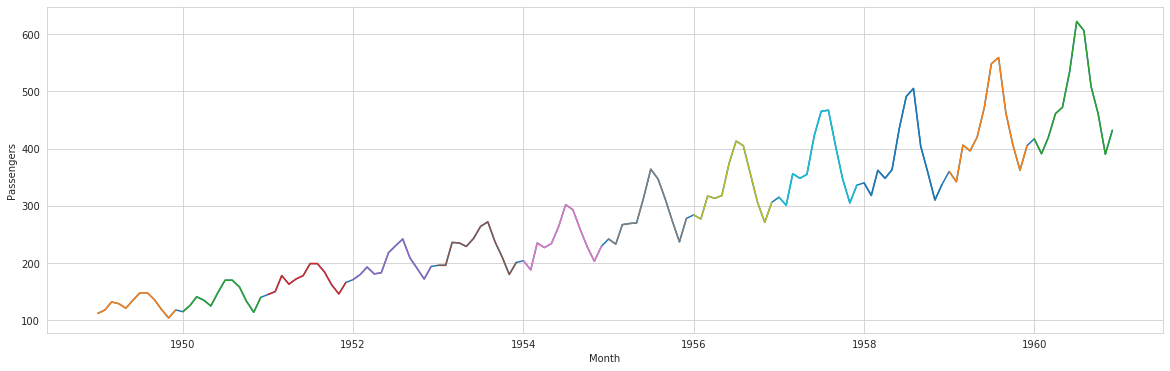

In [0]:
#@title International airline passengers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month'] =  pd.to_datetime(df['Month'], format='%Y-%m')


plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.lineplot(x=df['Month'], y=df['Passengers'])
for i in range(12):
    tmp = df[12 * i : 12 * (i + 1)]
    sns.lineplot(x=tmp['Month'], y=tmp['Passengers'])
plt.show()

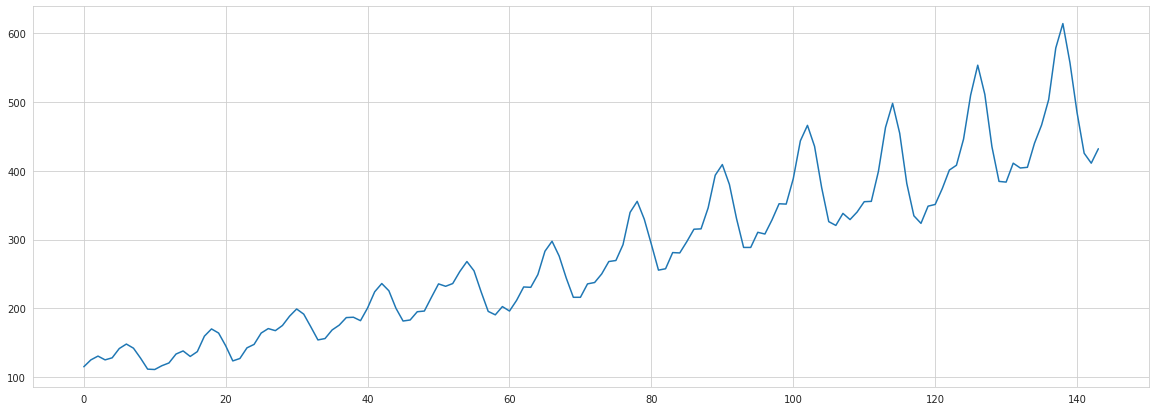

In [0]:
#@title Smoothing time series
y = df["Passengers"].values

y_smooth = np.array([sum(yy) / len(yy) for yy in zip(y[:-1], y[1:])] + [y[-1]])
y = y_smooth

plt.figure(figsize=(20, 7))
plt.plot(np.arange(len(y_smooth)), y_smooth)
plt.show()

Trend coefficients: SLOPE = 2.310, INTERCEPT = 103.906
R2: 0.644
MAPE: 7%


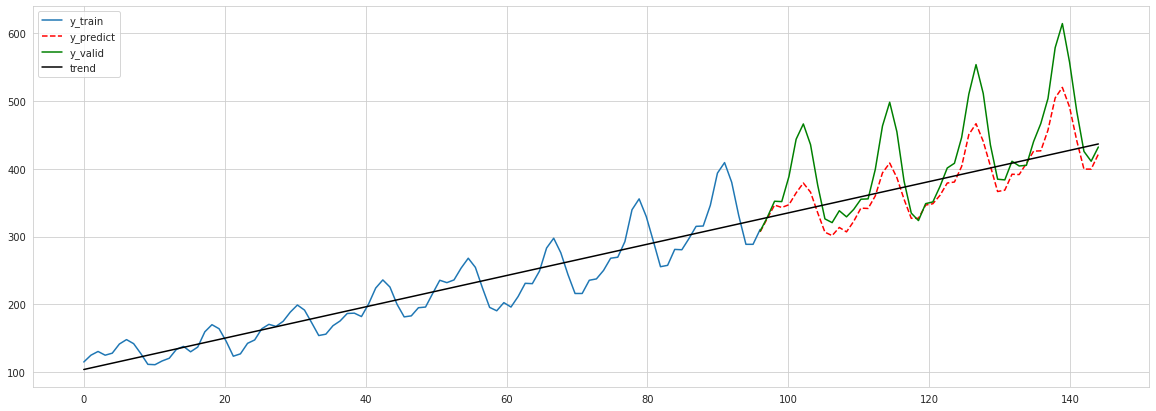

In [0]:
#@title Linear trend, use 4 prev. periods
y_train, y_valid = y[:96], y[96:]

xs = np.linspace(0, 96, 96)

def f(ab):
    a, b = ab
    ys = a * xs + b
    return sum(map(lambda x:x ** 2, y_train - ys))

import scipy
a, b = scipy.optimize.minimize(f, (100, 1)).x
ys = a * xs + b
print(f"Trend coefficients: SLOPE = {a:.3f}, INTERCEPT = {b:.3f}")

x_old = np.linspace(48, 96, 48)
x_new = np.linspace(96, 144, 48)
y_predict = (y_train[48:] - a * x_old - b) + a * x_new + b

from sklearn.metrics import r2_score
r2score = r2_score(y_valid, y_predict)
mape_score = 100 / 48 * sum(map(lambda ey:abs((ey[0] - ey[1]) / ey[1]), zip(y_predict, y_valid)))
print(f"R2: {r2score:.3f}")
print(f"MAPE: {mape_score:.0f}%")

plt.figure(figsize=(20, 7))
plt.plot(xs, y_train, label="y_train")
plt.plot(x_new, y_predict, "r--", label="y_predict")
plt.plot(x_new, y_valid, "g", label="y_valid")
plt.plot(np.linspace(0, 144), a * np.linspace(0, 144) + b, "k", label="trend")
plt.legend()
plt.show()

Trend coefficients: SLOPE = 2.310, INTERCEPT = 103.906
R2: 0.844
MAPE: 5%


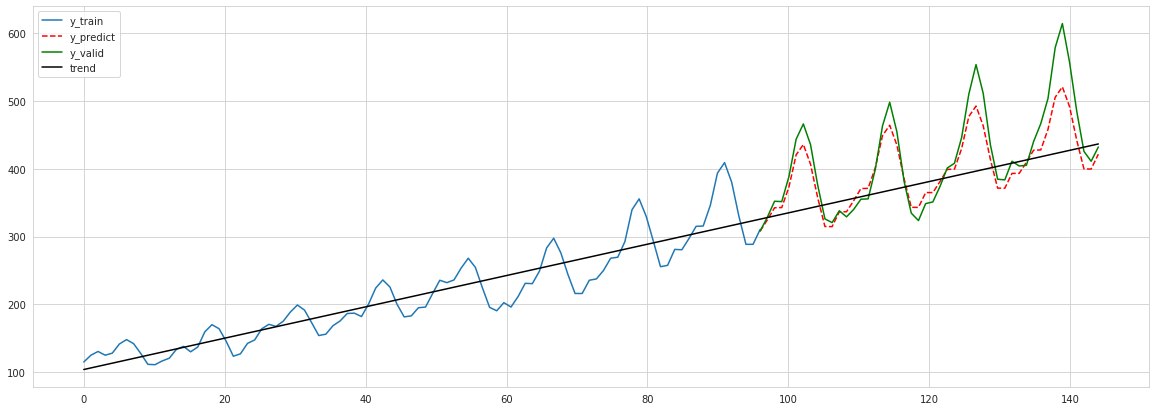

In [0]:
#@title Linear trend, use last period
y_train, y_valid = y[:96], y[96:]

xs = np.linspace(0, 96, 96)

def f(ab):
    a, b = ab
    ys = a * xs + b
    return sum(map(lambda x:x ** 2, y_train - ys))

import scipy
a, b = scipy.optimize.minimize(f, (100, 1)).x
ys = a * xs + b
print(f"Trend coefficients: SLOPE = {a:.3f}, INTERCEPT = {b:.3f}")

x_old = np.linspace(84, 96, 12)
x_new = np.linspace(96, 144, 48)
y_predict = (np.array(list(y_train[84:]) * 4) - a * np.array(list(x_old) * 4) - b) + a * x_new + b

from sklearn.metrics import r2_score
r2score = r2_score(y_valid, y_predict)
mape_score = 100 / 48 * sum(map(lambda ey:abs((ey[0] - ey[1]) / ey[1]), zip(y_predict, y_valid)))
print(f"R2: {r2score:.3f}")
print(f"MAPE: {mape_score:.0f}%")

plt.figure(figsize=(20, 7))
plt.plot(xs, y_train, label="y_train")
plt.plot(x_new, y_predict, "r--", label="y_predict")
plt.plot(x_new, y_valid, "g", label="y_valid")
plt.plot(np.linspace(0, 144), a * np.linspace(0, 144) + b, "k", label="trend")
plt.legend()
plt.show()

Trend coefficients: 0.010, 1.311, 119.723
R2: 0.790
MAPE: 7%


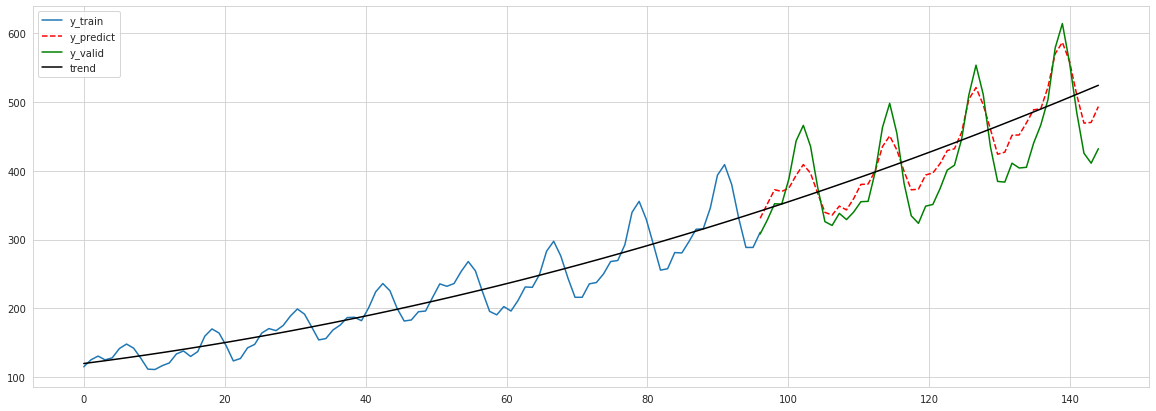

In [0]:
#@title Quadratic trend, use 4 prev. periods
y_train, y_valid = y[:96], y[96:]

xs = np.linspace(0, 96, 96)

def f(abc):
    a, b, c = abc
    ys = a * xs * xs + b * xs + c
    return sum(map(lambda x:x ** 2, y_train - ys))

import scipy
a, b, c = scipy.optimize.minimize(f, (0, 1, 50)).x
ys = a * xs * xs + b * xs + c
print(f"Trend coefficients: {a:.3f}, {b:.3f}, {c:.3f}")

x_old = np.linspace(48, 96, 48)
x_new = np.linspace(96, 144, 48)
y_predict = (y_train[48:] - a * x_old * x_old - b * x_old - c) + a * x_new * x_new + b * x_new + c

from sklearn.metrics import r2_score
r2score = r2_score(y_valid, y_predict)
mape_score = 100 / 48 * sum(map(lambda ey:abs((ey[0] - ey[1]) / ey[1]), zip(y_predict, y_valid)))
print(f"R2: {r2score:.3f}")
print(f"MAPE: {mape_score:.0f}%")

plt.figure(figsize=(20, 7))
plt.plot(xs, y_train, label="y_train")
plt.plot(x_new, y_predict, "r--", label="y_predict")
plt.plot(x_new, y_valid, "g", label="y_valid")
plt.plot(np.linspace(0, 144), a * np.linspace(0, 144) * np.linspace(0, 144) + b * np.linspace(0, 144) + c, "k", label="trend")
plt.legend()
plt.show()

Trend coefficients: 0.010, 1.311, 119.723
R2: 0.807
MAPE: 7%


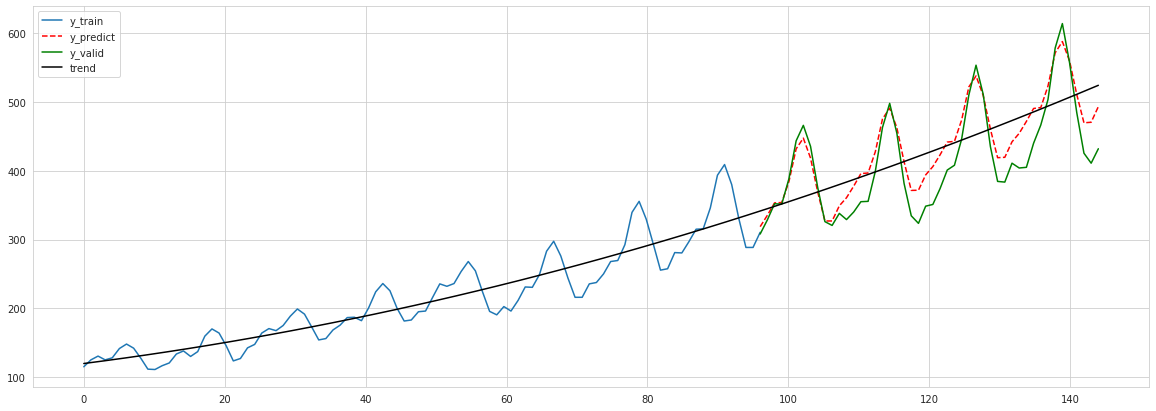

In [0]:
#@title Quadratic trend, use last period
y_train, y_valid = y[:96], y[96:]

xs = np.linspace(0, 96, 96)

def f(abc):
    a, b, c = abc
    ys = a * xs * xs + b * xs + c
    return sum(map(lambda x:x ** 2, y_train - ys))

import scipy
a, b, c = scipy.optimize.minimize(f, (0, 1, 50)).x
ys = a * xs * xs + b * xs + c
print(f"Trend coefficients: {a:.3f}, {b:.3f}, {c:.3f}")

x_old = np.linspace(84, 96, 12)
x_new = np.linspace(96, 144, 48)
y_predict = (np.array(list(y_train[84:]) * 4) - a * np.array(list(x_old) * 4) * np.array(list(x_old) * 4) - b * np.array(list(x_old) * 4) - c) + a * x_new * x_new + b * x_new + c

from sklearn.metrics import r2_score
r2score = r2_score(y_valid, y_predict)
mape_score = 100 / 48 * sum(map(lambda ey:abs((ey[0] - ey[1]) / ey[1]), zip(y_predict, y_valid)))
print(f"R2: {r2score:.3f}")
print(f"MAPE: {mape_score:.0f}%")

plt.figure(figsize=(20, 7))
plt.plot(xs, y_train, label="y_train")
plt.plot(x_new, y_predict, "r--", label="y_predict")
plt.plot(x_new, y_valid, "g", label="y_valid")
plt.plot(np.linspace(0, 144), a * np.linspace(0, 144) * np.linspace(0, 144) + b * np.linspace(0, 144) + c, "k", label="trend")
plt.legend()
plt.show()